# 1. Information Theory 

In [1]:
!ls

Color_FERET_Database		   image_folder  Q2.ipynb
ECSE626_assignment1_questions.pdf  Q1.ipynb


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from scipy import signal
import scipy

In [3]:
np.random.seed(0)

In [4]:
folder_path = "image_folder/"

## 1.1 Entropy of Retina Image

### Entropy Helper function

In [5]:
def entropy_image(I):
    counts = np.histogram(I, bins=I.max()-I.min()+1)[0]
    norm_counts = counts / counts.sum()
    entr = - (norm_counts[norm_counts>0] * np.log2(norm_counts[norm_counts>0])).sum()
    return entr

### 1.1.1 Entropy of the Retina Image

In [6]:
I = mpimg.imread(os.path.join(folder_path+'img_retina.jpg'))          # read image

In [7]:
print("Entropy of the Retina Image I:", entropy_image(I)) 

Entropy of the Retina Image I: 6.847117961729753


### 1.1.2 Generate Noise Image N_A = U[ -A, A]. Vary A from 0 to 200 in steps of 5 and generate different instances of N_A. Compute and plot in a single graph the entropy of: I, N_A, I + N_A as a function of A.

In [8]:
min_A = 0         # minimum value of A
max_A = 200       # maximum value of A
step = 5          # step of increment of A
entropy_I = []    # list to store entropy of I
entropy_Na = []   # list to store entropy of N_A
entropy_I_Na = [] # list to store entropy of I + N_A
A = []            # list to store values of A

In [9]:
for i in range(min_A,max_A+1,step):
    A.append(i)                               # store value of A
    N_A = np.random.randint(-i, i+1, I.shape) # generate N_A, note that +1 is necessary as maximum value is not inclusive in numpy
    entropy_I.append(entropy_image(I))        # calculate and store entropy of I
    entropy_Na.append(entropy_image(N_A))     # calculate and store entropy of N_A
    entropy_I_Na.append(entropy_image(I+N_A)) # calculate and store entropy of I + N_A

In [10]:
# convert lists into array
A = np.array(A)
entropy_I = np.array(entropy_I)
entropy_Na = np.array(entropy_Na)
entropy_I_Na = np.array(entropy_I_Na)

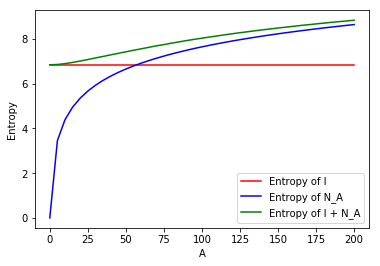

In [11]:
plt.plot(A, entropy_I, 'r', label='Entropy of I')
plt.plot(A, entropy_Na, 'b', label='Entropy of N_A')
plt.plot(A, entropy_I_Na, 'g', label='Entropy of I + N_A')
plt.xlabel('A')
plt.ylabel('Entropy')
plt.legend()
plt.show()

From this we can observe that entropy of Imaage (I) stays constant with increase in A. This is expected as we are I is unaffected by A. 

Entropy of N_A increases with increase in value of A. But this relationship is not increase. 

Similarly, we can also observe that with increase in value of A, entropy of I + N_a also increases. But this relationship is also not linear. Entropy of I+N_a is always greater than the entropy of I or entropy of N_a, but it is not a direct sum of them.

## 1.2 Mutual Information and KL divergence

### Mututal Information helper function

In [12]:
def MI_AB(A,B):
    
    epsi = 10e-25
    
    # calculate joint histogram of A and B
    histAB = np.histogram2d(A.ravel(), B.ravel(), bins=[A.max()-A.min()+1, B.max()-B.min()+1])[0]
    norm_histAB = histAB / histAB.sum()
    
    # calculate individual histogram of A and B
    histA  = np.histogram(A.ravel(), bins=A.max()-A.min()+1)[0]
    norm_histA = histA / histA.sum()
    histB  = np.histogram(B.ravel(), bins=B.max()-B.min()+1)[0]
    norm_histB = histB / histB.sum()
    
    # repeat norm_histA and norm_histB for faster computation
    norm_histA_rep = np.repeat(norm_histA[:,np.newaxis],len(norm_histB),axis=-1)
    norm_histB_rep = np.repeat(norm_histB[:,np.newaxis],len(norm_histA),axis=-1).T
    
    # calculate MI
    
    MI = ((norm_histAB[(norm_histAB>0) & (norm_histA_rep>0) & (norm_histB_rep>0)]) * np.log2( (norm_histAB[(norm_histAB>0) & (norm_histA_rep>0) & (norm_histB_rep>0)]) /  ((norm_histA_rep[(norm_histAB>0) & (norm_histA_rep>0) & (norm_histB_rep>0)]*norm_histB_rep[(norm_histAB>0) & (norm_histA_rep>0) & (norm_histB_rep>0)]) ) ) ).sum()

    return MI

### 1.2.1 Generate Noise Image N_A, by varying A from 0 to 200 in the steps of 5. Compute and plot the mutual information between I and I + N_A as a function of A.

In [13]:
min_A = 0         # minimum value of A
max_A = 200       # maximum value of A
step = 5          # step of increment of A
MI_I_I_Na = []    # list to store MI between I and I + N_A
A = []            # list to store values of A

In [14]:
for i in range(min_A,max_A+1,step):
    A.append(i)                               # store value of A
    N_A = np.random.randint(-i, i+1, I.shape) # generate N_A, note that +1 is necessary as maximum value is not inclusive in numpy
    MI_I_I_Na.append(MI_AB(I, I+N_A))         # calculate and store MI between I and I + N_A

In [15]:
# convert lists into array
A = np.array(A)
MI_I_I_Na = np.array(MI_I_I_Na)

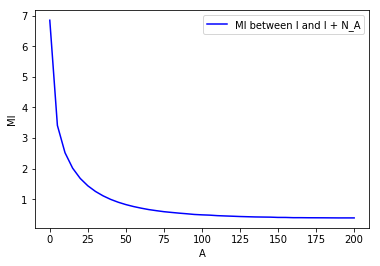

In [16]:
plt.plot(A, MI_I_I_Na, 'b', label='MI between I and I + N_A')
plt.xlabel('A')
plt.ylabel('MI')
plt.legend()
plt.show()

From the above graph we can see that MI between I and I+N_A decreases with increase in value of A. This shows that as the randomness in the noise increases, MI decreases. 

### 1.2.2 Generate single a single noise image, N_20. Compute the joint entropy of the image pair: H(I, I+N_20). Also verify numerically that: H(I; I+N_A) = H(I) + H(I+N_20) - MI(I; I+N_20)

### Joint Entropy helper function

In [17]:
def Joint_Entropy(A,B):

    epsi = 10e-25
    
    # calculate joint histogram of A and B
    histAB = np.histogram2d(A.ravel(), B.ravel(), bins=[A.max()-A.min()+1, B.max()-B.min()+1])[0]
    norm_histAB = histAB / histAB.sum()

    # calculate Joint Entropy
    JE = - (norm_histAB[norm_histAB>0] * np.log2(norm_histAB[norm_histAB>0])).sum()
    
    return JE    

In [18]:
N_20 = np.random.randint(-20,21, I.shape) # generate N_20, note that +1 is necessary as maximum value is not inclusive in numpy

In [19]:
Joint_Entropy_I_I_N20 = Joint_Entropy(I, I+N_20) # Joint entropy of I and I + N_20
Entropy_I = entropy_image(I)
Entropy_I_N20 = entropy_image(I+N_20)
MI_I_I_N20 = MI_AB(I, I+N_20)

In [20]:
print("H(I; I+N20): ", Joint_Entropy_I_I_N20)
print("H(I) + H(I+N20) - MI(I; I+N20): ", Entropy_I + Entropy_I_N20 - MI_I_I_N20)
print("Difference between above two: ", Entropy_I + Entropy_I_N20 - MI_I_I_N20 - Joint_Entropy_I_I_N20)

H(I; I+N20):  12.182877741459238
H(I) + H(I+N20) - MI(I; I+N20):  12.182877741459237
Difference between above two:  -1.7763568394002505e-15


From above, we can see that difference between H(I; I+N20) and H(I) + H(I+N20) - MI(I;I+N20) is almost zero. Thus we varified that they are equivalent. 

### 1.2.3 Compute forward and backward KL divergence between 

### KL Divergence helper function

In [21]:
def parzen_window_density(hist, window_size):
    window = signal.parzen(window_size)
    pwd = np.convolve(hist, window, 'same')
    return pwd


In [22]:
def KL_divergence(A,B,window_size=5, parzen_window=False, apply_to_A=True, apply_to_B=False):
    
    epsi = 10e-25
    
    # calculate range of combined A and B
    total_min = min(A.min(), B.min())
    total_max = max(A.max(), B.max())

    # calculate histA and histB
    histA = np.histogram(A.ravel(), bins=total_max-total_min+1, range=[total_min, total_max])[0]
    if parzen_window and apply_to_A:
        histA = parzen_window_density(histA, window_size) 
    norm_histA = histA / histA.sum()

    histB = np.histogram(B.ravel(), bins=total_max-total_min+1, range=[total_min, total_max])[0]
    if parzen_window and apply_to_B:
        histB = parzen_window_density(histB, window_size) 
    norm_histB = histB / histB.sum()
    
    # calculate KL Divergence
    KLD = - (norm_histA[(norm_histA>0) & (norm_histB>0) ] * np.log2( (norm_histB[(norm_histA>0) & (norm_histB>0) ]) / (norm_histA[(norm_histA>0) & (norm_histB>0) ]) )).sum()
    
    return KLD

### (i) I and the noise N of the same size as I; where pixel intensities of N are drawn from U[0,255] 

In [23]:
N_U = np.random.randint(0,256,I.shape)

In [24]:
F_KLD = KL_divergence(I, N_U)
B_KLD = KL_divergence(N_U, I)
print("Forward KL Divergence between I and N_U: ", F_KLD)
print("Backward KL Divergence between I and N_U: ", B_KLD)

Forward KL Divergence between I and N_U:  1.1519461622825244
Backward KL Divergence between I and N_U:  2.164815111442786


From the above values we can say that, I is able to approximate N_U in a better manner than N_U is able to approximate I, as value of Forward KL divergence is smaller compare to Backward KL divergence. 

### (ii) I and I+N20 from the previous question. Use parzen window filtering on the histogram of I.

In [25]:
N_20 = np.random.randint(-20,21,I.shape)

#### No parzen window

In [26]:
F_KLD = KL_divergence(I, I+N_20)
B_KLD = KL_divergence(I+N_20, I)
print("Forward KL Divergence between I and N_U: ", F_KLD)
print("Backward KL Divergence between I and N_U: ", B_KLD)

Forward KL Divergence between I and N_U:  0.034606133956389784
Backward KL Divergence between I and N_U:  0.04133233034511477


####  Parzen window only on I

In [27]:
window_size=11
F_KLD = KL_divergence(I, I+N_20, window_size=window_size, parzen_window=True, apply_to_A=True, apply_to_B=False)
B_KLD = KL_divergence(I+N_20, I, window_size=window_size, parzen_window=True, apply_to_A=False, apply_to_B=True)
print("Forward KL Divergence between I and N_U: {}, window_size: {}".format(F_KLD, window_size))
print("Backward KL Divergence between I and N_U: {}, window_size:{}".format(B_KLD,window_size))

Forward KL Divergence between I and N_U: 0.03237226764984605, window_size: 11
Backward KL Divergence between I and N_U: 0.039395430815245026, window_size:11


In [28]:
window_size=7
F_KLD = KL_divergence(I, I+N_20, window_size=window_size, parzen_window=True, apply_to_A=True, apply_to_B=False)
B_KLD = KL_divergence(I+N_20, I, window_size=window_size, parzen_window=True, apply_to_A=False, apply_to_B=True)
print("Forward KL Divergence between I and N_U: {}, window_size: {}".format(F_KLD, window_size))
print("Backward KL Divergence between I and N_U: {}, window_size:{}".format(B_KLD,window_size))

Forward KL Divergence between I and N_U: 0.03337029723344952, window_size: 7
Backward KL Divergence between I and N_U: 0.04079202147553072, window_size:7


In [29]:
window_size=3
F_KLD = KL_divergence(I, I+N_20, window_size=window_size, parzen_window=True, apply_to_A=True, apply_to_B=False)
B_KLD = KL_divergence(I+N_20, I, window_size=window_size, parzen_window=True, apply_to_A=False, apply_to_B=True)
print("Forward KL Divergence between I and N_U: {}, window_size: {}".format(F_KLD, window_size))
print("Backward KL Divergence between I and N_U: {}, window_size:{}".format(B_KLD,window_size))

Forward KL Divergence between I and N_U: 0.03433063139989136, window_size: 3
Backward KL Divergence between I and N_U: 0.04224336539981752, window_size:3


In [30]:
window_size=1
F_KLD = KL_divergence(I, I+N_20, window_size=window_size, parzen_window=True, apply_to_A=True, apply_to_B=False)
B_KLD = KL_divergence(I+N_20, I, window_size=window_size, parzen_window=True, apply_to_A=False, apply_to_B=True)
print("Forward KL Divergence between I and N_U: {}, window_size: {}".format(F_KLD, window_size))
print("Backward KL Divergence between I and N_U: {}, window_size:{}".format(B_KLD,window_size))

Forward KL Divergence between I and N_U: 0.034606133956389784, window_size: 1
Backward KL Divergence between I and N_U: 0.04133233034511477, window_size:1


#### Parzen window on both I and I+N_20

In [31]:
window_size=11
F_KLD = KL_divergence(I, I+N_20, window_size=window_size, parzen_window=True, apply_to_A=True, apply_to_B=True)
B_KLD = KL_divergence(I+N_20, I, window_size=window_size, parzen_window=True, apply_to_A=True, apply_to_B=True)
print("Forward KL Divergence between I and N_U: {}, window_size: {}".format(F_KLD, window_size))
print("Backward KL Divergence between I and N_U: {}, window_size:{}".format(B_KLD,window_size))

Forward KL Divergence between I and N_U: 0.03271314602735115, window_size: 11
Backward KL Divergence between I and N_U: 0.03973289541762002, window_size:11


In [32]:
window_size=7
F_KLD = KL_divergence(I, I+N_20, window_size=window_size, parzen_window=True, apply_to_A=True, apply_to_B=True)
B_KLD = KL_divergence(I+N_20, I, window_size=window_size, parzen_window=True, apply_to_A=True, apply_to_B=True)
print("Forward KL Divergence between I and N_U: {}, window_size: {}".format(F_KLD, window_size))
print("Backward KL Divergence between I and N_U: {}, window_size:{}".format(B_KLD,window_size))

Forward KL Divergence between I and N_U: 0.033366100048884136, window_size: 7
Backward KL Divergence between I and N_U: 0.04063894683680725, window_size:7


In [33]:
window_size=3
F_KLD = KL_divergence(I, I+N_20, window_size=window_size, parzen_window=True, apply_to_A=True, apply_to_B=True)
B_KLD = KL_divergence(I+N_20, I, window_size=window_size, parzen_window=True, apply_to_A=True, apply_to_B=True)
print("Forward KL Divergence between I and N_U: {}, window_size: {}".format(F_KLD, window_size))
print("Backward KL Divergence between I and N_U: {}, window_size:{}".format(B_KLD,window_size))

Forward KL Divergence between I and N_U: 0.03433197033858317, window_size: 3
Backward KL Divergence between I and N_U: 0.04211944943796332, window_size:3


In [34]:
window_size=1
F_KLD = KL_divergence(I, I+N_20, window_size=window_size, parzen_window=True, apply_to_A=True, apply_to_B=True)
B_KLD = KL_divergence(I+N_20, I, window_size=window_size, parzen_window=True, apply_to_A=True, apply_to_B=True)
print("Forward KL Divergence between I and N_U: {}, window_size: {}".format(F_KLD, window_size))
print("Backward KL Divergence between I and N_U: {}, window_size:{}".format(B_KLD,window_size))

Forward KL Divergence between I and N_U: 0.034606133956389784, window_size: 1
Backward KL Divergence between I and N_U: 0.04133233034511477, window_size:1


From the above values we can say that, I is able to approximate I+N_20 in a better manner than I+N_20 is able to approximate I, as value of Forward KL divergence is smaller compare to Backward KL divergence. 

We can also observe that as window_size of the parzen window increases, overall Forward and backward KL divergence decreases. This means that PDF as more smooth and affect of noise in I+N_20 decreases.

# 1.3 Registration

### 1.3.1 Registration on I1_1 with I1_2 and I2_1 with I2_2 using Mutual Information and Mean Suqared Error based similarity metrics 

In [35]:
I1_1 = mpimg.imread(os.path.join(folder_path+'I1_1.png'))          # read image
I1_2 = mpimg.imread(os.path.join(folder_path+'I1_2.png'))          # read image
I2_1 = mpimg.imread(os.path.join(folder_path+'I2_1.png'))          # read image
I2_2 = mpimg.imread(os.path.join(folder_path+'I2_2.png'))          # read image

I1_1 = (I1_1[:,:,0]*256).astype(int)
I1_2 = (I1_2[:,:,0]*256).astype(int)
I2_1 = (I2_1[:,:,0]*256).astype(int)
I2_2 = (I2_2[:,:,0]*256).astype(int)

We will consider the background tobe of zero (0) value.

In [36]:
def shift(A, num_shift=1, axis=0, pad_value=0):
    
    if num_shift==0:
        return A
    
    else:

        A_shift = np.ones(A.shape, dtype='int')*pad_value

        if axis == 0:
            if num_shift>0: # move down
                A_shift[num_shift::,:] = A[0:-num_shift,:]
            else:           # move up
                A_shift[0:-abs(num_shift),:] = A[abs(num_shift)::,:]
        else:
            if num_shift>0: # move right
                A_shift[:,num_shift::] = A[:,0:-num_shift]
            else:           # move left
                A_shift[:,0:-abs(num_shift)] = A[:,abs(num_shift)::]

        return A_shift


For simplicity we will ristrict our translation values to be in the range of -30:30. 

### Registration of I1_1 and I1_2

In [37]:
translation_range = 30
moving_image = np.copy(I1_1)
fixed_image = np.copy(I1_2)

translation_values = np.arange(-translation_range,translation_range+1,1)

MSE = np.zeros((translation_values.size, translation_values.size))
MI = np.zeros((translation_values.size, translation_values.size))

for i,x in enumerate(translation_values):
    for j,y in enumerate(translation_values):
        mv = shift(moving_image, x, axis=0)
        mv = shift(mv          , y, axis=1)
        
        MSE[i,j] = ((fixed_image - mv)**2).mean()
        MI[i,j]  = MI_AB(fixed_image, mv)        

#### Mutual Information based Registration

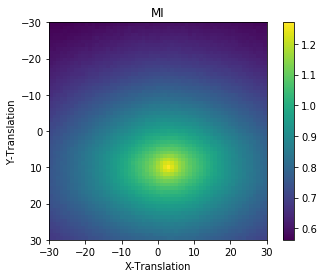

In [38]:
fig, ax = plt.subplots()
im = plt.imshow(MI, interpolation='none', extent=[-translation_range,translation_range,translation_range,-translation_range])
ax.set_xlabel('X-Translation')
ax.set_ylabel('Y-Translation')
ax.set_title('MI')
plt.colorbar()
plt.show()

In [39]:
# we want to find where MI in maximum
MI_indices = np.asarray(np.unravel_index(np.argmax(MI, axis=None), MI.shape)) - translation_range
print('MI based best translation parameters: X-translation = {}, Y-translation = {}'.format(MI_indices[0],MI_indices[1]))

MI based best translation parameters: X-translation = 10, Y-translation = 3


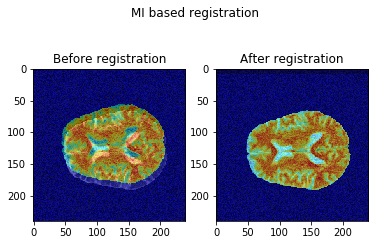

In [40]:
plt.subplot(121)
plt.imshow(I1_2, cmap='gray') 
plt.imshow(I1_1, cmap='jet', alpha=0.5) 
plt.title('Before registration')
plt.subplot(122)
plt.imshow(I1_2, cmap='gray') 
mv = shift(I1_1, MI_indices[0], axis=0)
mv = shift(mv, MI_indices[1], axis=1)
plt.imshow(mv, cmap='jet', alpha=0.5) 
plt.title('After registration')
plt.suptitle('MI based registration')
plt.show()

#### Mean Squared Error Based Registration

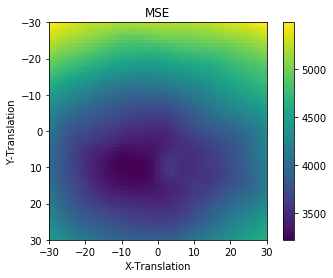

In [41]:
fig, ax = plt.subplots()
im = plt.imshow(MSE, interpolation='none', extent=[-translation_range,translation_range,translation_range,-translation_range])
ax.set_xlabel('X-Translation')
ax.set_ylabel('Y-Translation')
ax.set_title('MSE')
plt.colorbar()
plt.show()

In [42]:
# we want to find where MSE in minimum
MSE_indices = np.asarray(np.unravel_index(np.argmin(MSE, axis=None), MSE.shape)) - translation_range
print('MSE based best translation parameters: X-translation = {}, Y-translation = {}'.format(MSE_indices[0],MSE_indices[1]))

MSE based best translation parameters: X-translation = 9, Y-translation = -8


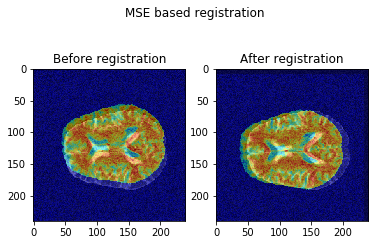

In [43]:
plt.subplot(121)
plt.imshow(I1_2, cmap='gray') 
plt.imshow(I1_1, cmap='jet', alpha=0.5) 
plt.title('Before registration')
plt.subplot(122)
plt.imshow(I1_2, cmap='gray') 
mv = shift(I1_1, MSE_indices[0], axis=0)
mv = shift(mv, MSE_indices[1], axis=1)
plt.imshow(mv, cmap='jet', alpha=0.5) 
plt.title('After registration')
plt.suptitle('MSE based registration')
plt.show()

From above, we can see that images (I1_2 and I1_1) are aligned properly after MI based registration while they are not aligned properly after MSE based registration

### Registration of I2_1 and I2_2

In [44]:
translation_range = 30
moving_image = np.copy(I2_1)
fixed_image = np.copy(I2_2)

translation_values = np.arange(-translation_range,translation_range+1,1)

MSE = np.zeros((translation_values.size, translation_values.size))
MI = np.zeros((translation_values.size, translation_values.size))

for i,x in enumerate(translation_values):
    for j,y in enumerate(translation_values):
        mv = shift(moving_image, x, axis=0)
        mv = shift(mv          , y, axis=1)
        
        MSE[i,j] = ((fixed_image - mv)**2).mean()
        MI[i,j]  = MI_AB(fixed_image, mv)        

#### Mutual Information based Registration

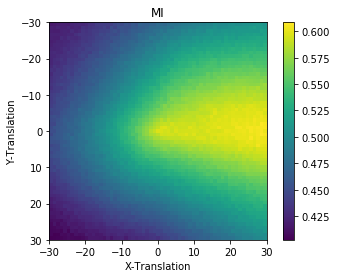

In [45]:
fig, ax = plt.subplots()
im = plt.imshow(MI, interpolation='none', extent=[-translation_range,translation_range,translation_range,-translation_range])
ax.set_xlabel('X-Translation')
ax.set_ylabel('Y-Translation')
ax.set_title('MI')
plt.colorbar()
plt.show()

In [46]:
# we want to find where MI in maximum
MI_indices = np.asarray(np.unravel_index(np.argmax(MI, axis=None), MI.shape)) - translation_range
print('MI based best translation parameters: X-translation = {}, Y-translation = {}'.format(MI_indices[0],MI_indices[1]))

MI based best translation parameters: X-translation = -2, Y-translation = 29


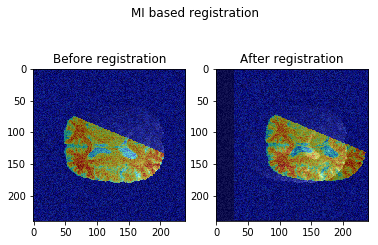

In [47]:
plt.subplot(121)
plt.imshow(I2_2, cmap='gray') 
plt.imshow(I2_1, cmap='jet', alpha=0.5) 
plt.title('Before registration')
plt.subplot(122)
plt.imshow(I2_2, cmap='gray') 
mv = shift(I2_1, MI_indices[0], axis=0)
mv = shift(mv, MI_indices[1], axis=1)
plt.imshow(mv, cmap='jet', alpha=0.5) 
plt.title('After registration')
plt.suptitle('MI based registration')
plt.show()

#### Mean Squared Error Based Registration

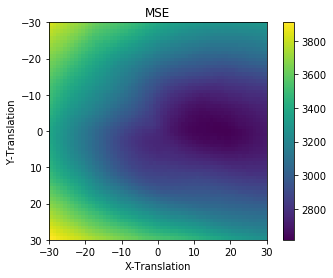

In [48]:
fig, ax = plt.subplots()
im = plt.imshow(MSE, interpolation='none', extent=[-translation_range,translation_range,translation_range,-translation_range])
ax.set_xlabel('X-Translation')
ax.set_ylabel('Y-Translation')
ax.set_title('MSE')
plt.colorbar()
plt.show()

In [49]:
# we want to find where MSE in minimum
MSE_indices = np.asarray(np.unravel_index(np.argmin(MSE, axis=None), MSE.shape)) - translation_range
print('MSE based best translation parameters: X-translation = {}, Y-translation = {}'.format(MSE_indices[0],MSE_indices[1]))

MSE based best translation parameters: X-translation = 0, Y-translation = 19


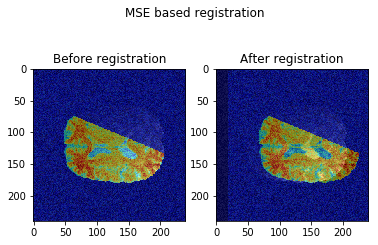

In [50]:
plt.subplot(121)
plt.imshow(I2_2, cmap='gray') 
plt.imshow(I2_1, cmap='jet', alpha=0.5) 
plt.title('Before registration')
plt.subplot(122)
plt.imshow(I2_2, cmap='gray') 
mv = shift(I2_1, MSE_indices[0], axis=0)
mv = shift(mv, MSE_indices[1], axis=1)
plt.imshow(mv, cmap='jet', alpha=0.5) 
plt.title('After registration')
plt.suptitle('MSE based registration')
plt.show()

From above, we can see that neither MI or MSE is able to find good translation parameters to register I2_1 and I2_2, as we can clearly see that images are misregistered after registration.

In fact, we can see that images were registered properly before registration so optimal translation parameters from either MI or MSE should have been 0,0. But they fail to give these parameters

### 1.3.2 Discuss the above results in terms of the assumptions inherent to the metrics. Describe the context in which each metric should be used. Support your arguments with an example or two.

In the previous quesiont, we saw that MI was able to register I1_1 and I1_2 properly, while it was not possible with MSE based metric. 

We can say that as MSE is computing pixel-wise squared error, it won't give optimal parameters for registration when moving and fixed images follow different intensity distribution. I.e., I1_1 and I1_2. MSE based reigstration will be able to recover optimal parameters if moving and fixed images follow same intensity distributions. I.e., I1_1 and I2_1 or I1_2 and I2_2.

While MI will be able to give optimal parameters as it relies on marignal entropy and joint entropy. MI based metric tries to find parameters where marginal entropy is maximum and joint entropy is minimum. Due to this MI based registration is able to handle cases where moving and fixed images are from different distributions. I.e. I1_1 and I1_2. 

Both these metrics will fail in cases where images are highly corrupted with noise or non-uniform intensity field, Or when both images don't capture the same structure and there is minimum overlap between their captured structure. I.e. I2_1 and I2_2, where we can see that I2_1 is missing top right part of the brain and I2_2 is highely corrupted by non-uniform intensity field ob top left part.